**##Data Description:**

For this case study, I'm utilizing publicly available data from Divvy, a real-world bike-share program in Chicago. The dataset has been anonymized and ethically sourced according to the terms of Motivate International Inc.'s data license agreement (http://www.divvybikes.com/data-license-agreement). It spans a full year, covering January 2022 to December 2023.

Changes: 
I've chosen to rename the dataset name to "Cyclistic" for project relevance.

## **Data Preparation:**

In [2]:
import os
import pandas as pd

# Directory path where CSV files are located
directory_path = r'C:\Users\raksh\OneDrive\Desktop\portfolio projects\Project#2 - case study 1\Sample copy'

# List all CSV files in the directory
all_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
df = pd.DataFrame()

# Load all files into a single DataFrame
for file in all_files:
    file_path = os.path.join(directory_path, file)
    df_temp = pd.read_csv(file_path)
    df = pd.concat([df, df_temp], ignore_index=True)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   ride_length         object 
 5   day_of_week         int64  
 6   start_station_name  object 
 7   start_station_id    object 
 8   end_station_name    object 
 9   end_station_id      object 
 10  start_lat           float64
 11  start_lng           float64
 12  end_lat             float64
 13  end_lng             float64
 14  member_casual       object 
dtypes: float64(4), int64(1), object(10)
memory usage: 654.6+ MB
None


In [4]:
df

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at.1
0,F96D5A74A3E41399,electric_bike,21-01-2023 20:05,21-01-2023 20:16,00:11:00,7.0,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,NaN
1,13CB7EB698CEDB88,classic_bike,10-01-2023 15:37,10-01-2023 15:46,00:09:00,3.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
2,BD88A2E670661CE5,electric_bike,02-01-2023 07:51,02-01-2023 08:05,00:14:00,2.0,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,NaN
3,C90792D034FED968,classic_bike,22-01-2023 10:52,22-01-2023 11:01,00:09:00,1.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
4,3397017529188E8A,classic_bike,12-01-2023 13:58,12-01-2023 14:13,00:15:00,5.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,07-12-2023 13:15,07-12-2023 13:17,00:02:13,5.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual,NaN
5719873,BCDA66E761CC1029,classic_bike,08-12-2023 18:42,08-12-2023 18:45,00:03:35,6.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719874,D2CF330F9C266683,classic_bike,05-12-2023 14:09,05-12-2023 14:13,00:03:50,3.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,NaN
5719875,3829A0D1E00EE970,electric_bike,02-12-2023 21:36,02-12-2023 21:53,00:17:38,7.0,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,41.885492,-87.652289,casual,NaN


In [4]:
# Remove duplicate rows based on 'ride_id'
df = df.drop_duplicates(subset=['ride_id'])

# Verify that duplicates are removed
print("Number of Rows after Removing Duplicates:", len(df))

Number of Rows after Removing Duplicates: 5719738


In [5]:
df_copy = df.copy()# Fill null values in start_station_name based on the first two digits after the decimal point in start_station_id
df_copy['start_station_name'] = df_copy.groupby(df_copy['start_station_id'].apply(lambda x: x.split('.')[1] if (pd.notna(x) and '.' in x) else x))['start_station_name'].transform('first')

# Fill null values in start_station_id based on start_station_name
df_copy['start_station_id'] = df_copy.groupby('start_station_name')['start_station_id'].transform('first')

# Display the updated DataFrame
print(df_copy.head())

            ride_id  rideable_type        started_at          ended_at  \
0  F96D5A74A3E41399  electric_bike  21-01-2023 20:05  21-01-2023 20:16   
1  13CB7EB698CEDB88   classic_bike  10-01-2023 15:37  10-01-2023 15:46   
2  BD88A2E670661CE5  electric_bike  02-01-2023 07:51  02-01-2023 08:05   
3  C90792D034FED968   classic_bike  22-01-2023 10:52  22-01-2023 11:01   
4  3397017529188E8A   classic_bike  12-01-2023 13:58  12-01-2023 14:13   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00            7  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00            3        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00            2       Western Ave & Lunt Ave           RP-005   
3    00:09:00            1        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00            5        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \
0       Hampden Ct & Div

In [6]:
# Fill null values in end_station_name based on the first two digits after the decimal point in end_station_id
df_copy['end_station_name'] = df_copy.groupby(df_copy['end_station_id'].apply(lambda x: x.split('.')[1] if (pd.notna(x) and '.' in x) else x))['end_station_name'].transform('first')

# Fill null values in end_station_id based on end_station_name
df_copy['end_station_id'] = df_copy.groupby('end_station_name')['end_station_id'].transform('first')

# Display the updated DataFrame
print(df_copy.head())

            ride_id  rideable_type        started_at          ended_at  \
0  F96D5A74A3E41399  electric_bike  21-01-2023 20:05  21-01-2023 20:16   
1  13CB7EB698CEDB88   classic_bike  10-01-2023 15:37  10-01-2023 15:46   
2  BD88A2E670661CE5  electric_bike  02-01-2023 07:51  02-01-2023 08:05   
3  C90792D034FED968   classic_bike  22-01-2023 10:52  22-01-2023 11:01   
4  3397017529188E8A   classic_bike  12-01-2023 13:58  12-01-2023 14:13   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00            7  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00            3        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00            2       Western Ave & Lunt Ave           RP-005   
3    00:09:00            1        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00            5        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \
0       Hampden Ct & Div

In [7]:
# Fill null values in start_lat based on start_station_name and start_station_id
df_copy['start_lat'] = df_copy.groupby(['start_station_name', 'start_station_id'])['start_lat'].transform('first')

# Fill null values in start_lng based on start_station_name and start_station_id
df_copy['start_lng'] = df_copy.groupby(['start_station_name', 'start_station_id'])['start_lng'].transform('first')

In [8]:
# Fill null values in end_lat based on end_station_name and end_station_id
df_copy['end_lat'] = df_copy.groupby(['end_station_name', 'end_station_id'])['end_lat'].transform('first')

# Fill null values in end_lng based on end_station_name and end_station_id
df_copy['end_lng'] = df_copy.groupby(['end_station_name', 'end_station_id'])['end_lng'].transform('first')

In [9]:
# Fill null values in start_station_id based on start_lat and start_lng
df_copy['start_station_id'] = df_copy.groupby(['start_lat', 'start_lng'])['start_station_id'].transform('first')

# Fill null values in start_station_name based on start_station_id
df_copy['start_station_name'] = df_copy.groupby('start_station_id')['start_station_name'].transform('first')

In [10]:
# Fill null values in end_station_id based on end_lat and end_lng
df_copy['end_station_id'] = df_copy.groupby(['end_lat', 'end_lng'])['end_station_id'].transform('first')

# Fill null values in end_station_name based on end_station_id
df_copy['end_station_name'] = df_copy.groupby('end_station_id')['end_station_name'].transform('first')

In [11]:
print(df_copy.head())

            ride_id  rideable_type        started_at          ended_at  \
0  F96D5A74A3E41399  electric_bike  21-01-2023 20:05  21-01-2023 20:16   
1  13CB7EB698CEDB88   classic_bike  10-01-2023 15:37  10-01-2023 15:46   
2  BD88A2E670661CE5  electric_bike  02-01-2023 07:51  02-01-2023 08:05   
3  C90792D034FED968   classic_bike  22-01-2023 10:52  22-01-2023 11:01   
4  3397017529188E8A   classic_bike  12-01-2023 13:58  12-01-2023 14:13   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00            7  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00            3        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00            2       Western Ave & Lunt Ave           RP-005   
3    00:09:00            1        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00            5        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \
0       Hampden Ct & Div

In [12]:
print(df_copy.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
ride_length                0
day_of_week                0
start_station_name    875820
start_station_id      875820
end_station_name      929310
end_station_id        929310
start_lat             875820
start_lng             875820
end_lat               929310
end_lng               929310
member_casual              0
dtype: int64


In [13]:
# Display rows with null values for the specified columns
null_values = df_copy[df_copy.isnull().any(axis=1)]
print(null_values)

                  ride_id  rideable_type        started_at          ended_at  \
105      3F624CAD11ADC36B  electric_bike  24-01-2023 19:15  24-01-2023 19:21   
106      7F4991C08F87A20F  electric_bike  27-01-2023 12:36  27-01-2023 13:02   
107      F3AD17CF04B88EE9  electric_bike  20-01-2023 00:37  20-01-2023 00:46   
108      CA3677FEF8FD11B6  electric_bike  27-01-2023 02:13  27-01-2023 02:18   
110      6FFD201EBB80C87C  electric_bike  16-01-2023 01:43  16-01-2023 01:52   
...                   ...            ...               ...               ...   
5715933  BEE82452635B6FE4  electric_bike  18-12-2023 10:24  18-12-2023 10:34   
5715934  402B4754000FE2BC  electric_bike  27-12-2023 18:03  27-12-2023 18:15   
5715935  E26081001B5C2E3C  electric_bike  16-12-2023 15:01  16-12-2023 15:09   
5715936  A0252B843C8BF99E  electric_bike  09-12-2023 08:49  09-12-2023 08:58   
5715937  94ECAC6EEEA1CDF1  electric_bike  08-12-2023 17:57  08-12-2023 18:03   

        ride_length  day_of_week start_

In [16]:
df_copy

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at.1
0,F96D5A74A3E41399,electric_bike,21-01-2023 20:05,21-01-2023 20:16,00:11:00,7.0,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,NaN
1,13CB7EB698CEDB88,classic_bike,10-01-2023 15:37,10-01-2023 15:46,00:09:00,3.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
2,BD88A2E670661CE5,electric_bike,02-01-2023 07:51,02-01-2023 08:05,00:14:00,2.0,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,NaN
3,C90792D034FED968,classic_bike,22-01-2023 10:52,22-01-2023 11:01,00:09:00,1.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
4,3397017529188E8A,classic_bike,12-01-2023 13:58,12-01-2023 14:13,00:15:00,5.0,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,07-12-2023 13:15,07-12-2023 13:17,00:02:13,5.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719873,BCDA66E761CC1029,classic_bike,08-12-2023 18:42,08-12-2023 18:45,00:03:35,6.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719874,D2CF330F9C266683,classic_bike,05-12-2023 14:09,05-12-2023 14:13,00:03:50,3.0,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,NaN
5719875,3829A0D1E00EE970,electric_bike,02-12-2023 21:36,02-12-2023 21:53,00:17:38,7.0,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual,NaN


In [14]:
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5719738 entries, 0 to 5719876
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   ride_length         object 
 5   day_of_week         int64  
 6   start_station_name  object 
 7   start_station_id    object 
 8   end_station_name    object 
 9   end_station_id      object 
 10  start_lat           float64
 11  start_lng           float64
 12  end_lat             float64
 13  end_lng             float64
 14  member_casual       object 
dtypes: float64(4), int64(1), object(10)
memory usage: 698.2+ MB
None


In [ ]:
# Convert columns to appropriate data types
df_copy['started_at'] = pd.to_datetime(df_copy['started_at'])
df_copy['ended_at'] = pd.to_datetime(df_copy['ended_at'])

# Convert 'ride_length' to numeric 
df_copy['ride_length'] = pd.to_numeric(df_copy['ride_length'], errors='coerce')

# Convert 'ride_length' to timedelta
df_copy['ride_length'] = pd.to_timedelta(df_copy['ride_length'], unit='s')
df_copy['day_of_week'] = df_copy['day_of_week'].astype('Int64')  # Convert to nullable integer type

# Verify the updated data types
print(df_copy.dtypes)

In [16]:
df_copy['started_at'] = pd.to_datetime(df_copy['started_at'])
df_copy['ended_at'] = pd.to_datetime(df_copy['ended_at'])

# Calculate ride length in seconds
df_copy['ride_length_seconds'] = (df_copy['ended_at'] - df_copy['started_at']).dt.total_seconds()

# Convert ride length to timedelta
df_copy['ride_length'] = pd.to_timedelta(df_copy['ride_length_seconds'], unit='s')

# Format ride length as HH:MM:SS
df_copy['ride_length'] = df_copy['ride_length'].astype(str).str.extract(r'(\d+:\d+:\d+)')

# Display the DataFrame with the updated ride_length column
print(df_copy[['started_at', 'ended_at', 'ride_length']])

                 started_at            ended_at ride_length
0       2023-01-21 20:05:00 2023-01-21 20:16:00    00:11:00
1       2023-01-10 15:37:00 2023-01-10 15:46:00    00:09:00
2       2023-01-02 07:51:00 2023-01-02 08:05:00    00:14:00
3       2023-01-22 10:52:00 2023-01-22 11:01:00    00:09:00
4       2023-01-12 13:58:00 2023-01-12 14:13:00    00:15:00
...                     ...                 ...         ...
5719872 2023-12-07 13:15:00 2023-12-07 13:17:00    00:02:00
5719873 2023-12-08 18:42:00 2023-12-08 18:45:00    00:03:00
5719874 2023-12-05 14:09:00 2023-12-05 14:13:00    00:04:00
5719875 2023-12-02 21:36:00 2023-12-02 21:53:00    00:17:00
5719876 2023-12-11 13:07:00 2023-12-11 13:11:00    00:04:00

[5719738 rows x 3 columns]


In [17]:
df_copy['ride_length_seconds'] = (df_copy['ended_at'] - df_copy['started_at']).dt.total_seconds()

# Filter out rows with ride length less than 0 or more than 1440 minutes
df_copy = df_copy[(df_copy['ride_length_seconds'] >= 0) & (df_copy['ride_length_seconds'] <= 1440 * 60)]

# Drop the temporary 'ride_length_seconds' column if not needed
df_copy = df_copy.drop(columns=['ride_length_seconds'])

# Display the updated DataFrame
print(df_copy.head())

            ride_id  rideable_type          started_at            ended_at  \
0  F96D5A74A3E41399  electric_bike 2023-01-21 20:05:00 2023-01-21 20:16:00   
1  13CB7EB698CEDB88   classic_bike 2023-01-10 15:37:00 2023-01-10 15:46:00   
2  BD88A2E670661CE5  electric_bike 2023-01-02 07:51:00 2023-01-02 08:05:00   
3  C90792D034FED968   classic_bike 2023-01-22 10:52:00 2023-01-22 11:01:00   
4  3397017529188E8A   classic_bike 2023-01-12 13:58:00 2023-01-12 14:13:00   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00            7  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00            3        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00            2       Western Ave & Lunt Ave           RP-005   
3    00:09:00            1        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00            5        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \


In [21]:
df_copy

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at.1
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:00,2023-01-21 20:16:00,00:11:00,7,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,NaN
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:00,2023-01-10 15:46:00,00:09:00,3,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:00,2023-01-02 08:05:00,00:14:00,2,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,NaN
3,C90792D034FED968,classic_bike,2023-01-22 10:52:00,2023-01-22 11:01:00,00:09:00,1,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
4,3397017529188E8A,classic_bike,2023-01-12 13:58:00,2023-01-12 14:13:00,00:15:00,5,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,00:02:00,5,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,00:03:00,6,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,NaN
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,00:04:00,3,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,NaN
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,00:17:00,7,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual,NaN


In [18]:
print(df_copy.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
ride_length                0
day_of_week                0
start_station_name    875737
start_station_id      875737
end_station_name      923005
end_station_id        923005
start_lat             875737
start_lng             875737
end_lat               923005
end_lng               923005
member_casual              0
dtype: int64


In [19]:
df_copy['Start_day'] = df_copy['started_at'].dt.day
df_copy['Start_month'] = df_copy['started_at'].dt.month
df_copy['Start_year'] = df_copy['started_at'].dt.year

# Display the updated DataFrame
print(df_copy.head())

            ride_id  rideable_type          started_at            ended_at  \
0  F96D5A74A3E41399  electric_bike 2023-01-21 20:05:00 2023-01-21 20:16:00   
1  13CB7EB698CEDB88   classic_bike 2023-01-10 15:37:00 2023-01-10 15:46:00   
2  BD88A2E670661CE5  electric_bike 2023-01-02 07:51:00 2023-01-02 08:05:00   
3  C90792D034FED968   classic_bike 2023-01-22 10:52:00 2023-01-22 11:01:00   
4  3397017529188E8A   classic_bike 2023-01-12 13:58:00 2023-01-12 14:13:00   

  ride_length  day_of_week           start_station_name start_station_id  \
0    00:11:00            7  Lincoln Ave & Fullerton Ave     TA1309000058   
1    00:09:00            3        Kimbark Ave & 53rd St     TA1309000037   
2    00:14:00            2       Western Ave & Lunt Ave           RP-005   
3    00:09:00            1        Kimbark Ave & 53rd St     TA1309000037   
4    00:15:00            5        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \


In [20]:
print(df_copy.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
ride_length                0
day_of_week                0
start_station_name    875737
start_station_id      875737
end_station_name      923005
end_station_id        923005
start_lat             875737
start_lng             875737
end_lat               923005
end_lng               923005
member_casual              0
Start_day                  0
Start_month                0
Start_year                 0
dtype: int64


In [21]:
# Get the number of rows and columns
num_rows, num_columns = df_copy.shape

# Print the results
print(f'Total Rows: {num_rows}')
print(f'Total Columns: {num_columns}')

Total Rows: 5713187
Total Columns: 18


In [22]:
# Get unique start and end stations
unique_start_stations = df_copy['start_station_name'].unique()
unique_end_stations = df_copy['end_station_name'].unique()

# Display the unique start and end stations
print("Unique Start Stations:")
print(unique_start_stations)

print("\nUnique End Stations:")
print(unique_end_stations)

# Display the count of each start and end station
print("\nStart Station Counts:")
print(df_copy['start_station_name'].value_counts())

print("\nEnd Station Counts:")
print(df_copy['end_station_name'].value_counts())

Unique Start Stations:
['Lincoln Ave & Fullerton Ave' 'Kimbark Ave & 53rd St'
 'Western Ave & Lunt Ave' ... 'Public Rack - Princeton Ave & 99th Pl'
 'Keeler Ave & Carmen Ave' 'Scottsdale Park']

Unique End Stations:
['Hampden Ct & Diversey Ave' 'Greenwood Ave & 47th St'
 'Valli Produce - Evanston Plaza' ...
 'Public Rack - Ashland Ave & 74th St'
 'Public Rack - Cottage Grove Ave & 91st St' 'Scottsdale Park']

Start Station Counts:
start_station_name
Streeter Dr & Grand Ave                         63036
DuSable Lake Shore Dr & Monroe St               40147
Michigan Ave & Oak St                           37311
DuSable Lake Shore Dr & North Blvd              35907
Clark St & Elm St                               35781
                                                ...  
Public Rack - Pulaski Rd & Grenshaw St              1
Public Rack - Oleander Ave & Addison St             1
Public Rack - Devon Ave & Kinzua Ave                1
Public Rack - Newcastle Ave & Wellington Ave        1
Public

In [39]:
# Check if each start_station_id is associated with one or multiple start_station_name
station_id_count = df_new.groupby('start_station_id')['start_station_name'].nunique()

# Print stations with multiple names
multiple_names = station_id_count[station_id_count > 1]
if not multiple_names.empty:
    print("Stations with multiple names:")
    print(df_new[df_new['start_station_id'].isin(multiple_names.index)][['start_station_id', 'start_station_name']].drop_duplicates())
else:
    print("All stations have a unique name.")

# Print stations with one name
single_name = station_id_count[station_id_count == 1]
print("Stations with one name:")
print(df_new[df_new['start_station_id'].isin(single_name.index)][['start_station_id', 'start_station_name']].drop_duplicates())

All stations have a unique name.
Stations with one name:
        start_station_id                     start_station_name
0           TA1309000058            Lincoln Ave & Fullerton Ave
1           TA1309000037                  Kimbark Ave & 53rd St
2                 RP-005                 Western Ave & Lunt Ave
5           TA1309000019          Lakeview Ave & Fullerton Pkwy
12                 13325                Broadway & Waveland Ave
...                  ...                                    ...
5670789             1062   Public Rack - Kedzie Ave & Walnut St
5673758              622  Public Rack - Princeton Ave & 99th Pl
5697688            23110                Keeler Ave & Carmen Ave
5706618            23172              Kostner Ave & Belmont Ave
5707234            23113                        Scottsdale Park

[1198 rows x 2 columns]


In [23]:
print(df_copy.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
ride_length                   object
day_of_week                    Int64
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
Start_day                      int32
Start_month                    int32
Start_year                     int32
dtype: object


In [24]:
df_copy['ride_length'] = pd.to_timedelta(df_copy['ride_length'])

In [25]:
print(df_copy.dtypes)

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
ride_length           timedelta64[ns]
day_of_week                     Int64
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
Start_day                       int32
Start_month                     int32
Start_year                      int32
dtype: object


In [26]:
columns_to_dropna = [
    'ride_id', 'rideable_type', 'started_at', 'ended_at', 'ride_length', 'day_of_week',
    'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id',
    'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual',
    'Start_day', 'Start_month', 'Start_year'
]

# Drop rows with null values in the specified columns
df_cleaned = df_copy.dropna(subset=columns_to_dropna)

# Display the updated DataFrame
print(df_cleaned.head())

            ride_id  rideable_type          started_at            ended_at  \
0  F96D5A74A3E41399  electric_bike 2023-01-21 20:05:00 2023-01-21 20:16:00   
1  13CB7EB698CEDB88   classic_bike 2023-01-10 15:37:00 2023-01-10 15:46:00   
2  BD88A2E670661CE5  electric_bike 2023-01-02 07:51:00 2023-01-02 08:05:00   
3  C90792D034FED968   classic_bike 2023-01-22 10:52:00 2023-01-22 11:01:00   
4  3397017529188E8A   classic_bike 2023-01-12 13:58:00 2023-01-12 14:13:00   

      ride_length  day_of_week           start_station_name start_station_id  \
0 0 days 00:11:00            7  Lincoln Ave & Fullerton Ave     TA1309000058   
1 0 days 00:09:00            3        Kimbark Ave & 53rd St     TA1309000037   
2 0 days 00:14:00            2       Western Ave & Lunt Ave           RP-005   
3 0 days 00:09:00            1        Kimbark Ave & 53rd St     TA1309000037   
4 0 days 00:15:00            5        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  

In [27]:
df_cleaned

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start_day,Start_month,Start_year
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:00,2023-01-21 20:16:00,0 days 00:11:00,7,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,21,1,2023
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:00,2023-01-10 15:46:00,0 days 00:09:00,3,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,10,1,2023
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:00,2023-01-02 08:05:00,0 days 00:14:00,2,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2,1,2023
3,C90792D034FED968,classic_bike,2023-01-22 10:52:00,2023-01-22 11:01:00,0 days 00:09:00,1,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,22,1,2023
4,3397017529188E8A,classic_bike,2023-01-12 13:58:00,2023-01-12 14:13:00,0 days 00:15:00,5,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,12,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,0 days 00:02:00,5,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,7,12,2023
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,0 days 00:03:00,6,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,8,12,2023
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,0 days 00:04:00,3,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,5,12,2023
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,0 days 00:17:00,7,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual,2,12,2023


In [31]:
print(df_cleaned.isnull().sum())

ride_id                0
rideable_type          0
started_at             0
ended_at               0
ride_length            0
day_of_week            0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
Start_day              0
Start_month            0
Start_year             0
ride_length_seconds    0
dtype: int64


In [ ]:
# Convert 'ride_length' to seconds
df_cleaned['ride_length_seconds'] = df_cleaned['ride_length'].dt.total_seconds()

# Create a mask for rows with ride length less than 1 minute or more than or equal to 1 day
mask = (df_cleaned['ride_length_seconds'] < 60) | (df_cleaned['ride_length_seconds'] >= 86400)

# Remove rows based on the mask
df_filtered = df_cleaned[~mask]

df_filtered = df_filtered.drop(columns=['ride_length_seconds'])

In [30]:
df_filtered

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start_day,Start_month,Start_year
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:00,2023-01-21 20:16:00,0 days 00:11:00,7,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member,21,1,2023
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:00,2023-01-10 15:46:00,0 days 00:09:00,3,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,10,1,2023
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:00,2023-01-02 08:05:00,0 days 00:14:00,2,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,2,1,2023
3,C90792D034FED968,classic_bike,2023-01-22 10:52:00,2023-01-22 11:01:00,0 days 00:09:00,1,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,22,1,2023
4,3397017529188E8A,classic_bike,2023-01-12 13:58:00,2023-01-12 14:13:00,0 days 00:15:00,5,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,12,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:00,2023-12-07 13:17:00,0 days 00:02:00,5,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,7,12,2023
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:00,2023-12-08 18:45:00,0 days 00:03:00,6,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,8,12,2023
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:00,2023-12-05 14:13:00,0 days 00:04:00,3,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,5,12,2023
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:00,2023-12-02 21:53:00,0 days 00:17:00,7,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881370,-87.674930,41.885492,-87.652289,casual,2,12,2023


In [33]:
df_new = df_filtered.copy() 

In [35]:
df_new.to_csv('df_new_data.csv', index=False)

In [34]:
print(df_new.dtypes)

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
ride_length           timedelta64[ns]
day_of_week                     Int64
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
Start_day                       int32
Start_month                     int32
Start_year                      int32
dtype: object


## **Analyzing the cleaned dataset(EDA)**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
total_rows = len(df_new)
print("Total number of rows:", total_rows)

Total number of rows: 4280238


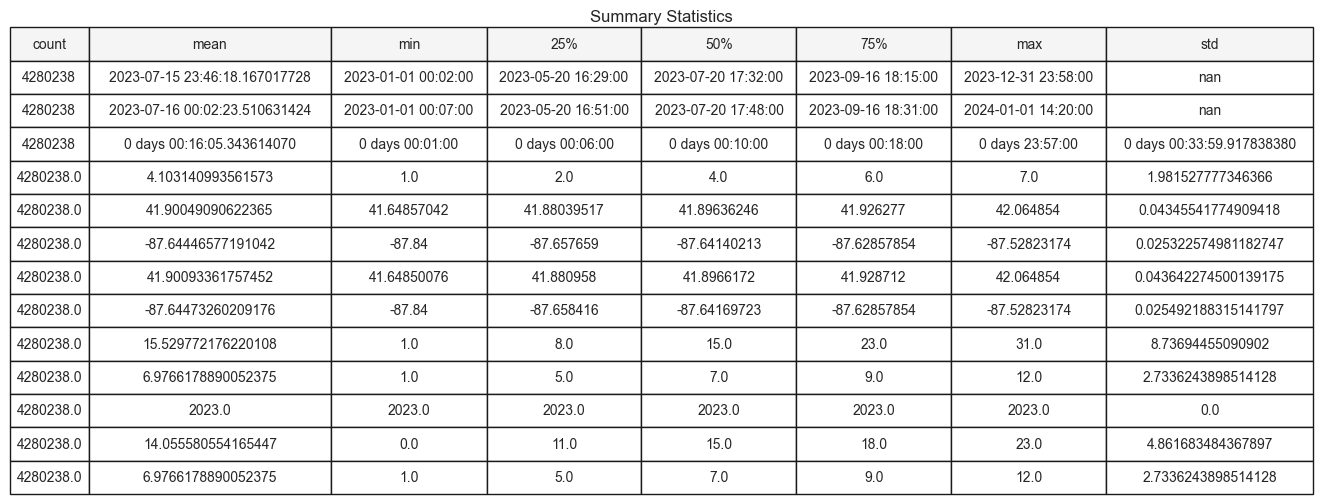

In [114]:
summary_stats = df_new.describe().transpose()

# Display the summary statistics in a table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Turn off axis
table = ax.table(cellText=summary_stats.values,
                 colLabels=summary_stats.columns,
                 cellLoc='center', loc='center', colColours=['#f5f5f5']*len(summary_stats.columns),
                 colWidths=[0.15]*len(summary_stats.columns))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(summary_stats.columns))))

plt.title('Summary Statistics')

# Adjust the position of the table to accommodate column names
table.scale(1, 2)

plt.show()

In [74]:
# Summary Statistics in Tabular Format
summary_stats = df_new.describe().transpose()
print(summary_stats)

                 count                           mean                  min  \
started_at     4280238  2023-07-15 23:46:18.167017728  2023-01-01 00:02:00   
ended_at       4280238  2023-07-16 00:02:23.510631424  2023-01-01 00:07:00   
ride_length    4280238      0 days 00:16:05.343614070      0 days 00:01:00   
day_of_week  4280238.0                       4.103141                  1.0   
start_lat    4280238.0                      41.900491             41.64857   
start_lng    4280238.0                     -87.644466               -87.84   
end_lat      4280238.0                      41.900934            41.648501   
end_lng      4280238.0                     -87.644733               -87.84   
Start_day    4280238.0                      15.529772                  1.0   
Start_month  4280238.0                       6.976618                  1.0   
Start_year   4280238.0                         2023.0               2023.0   

                             25%                  50%          

member_casual
casual   0 days 00:23:02.342186842
member   0 days 00:12:16.469692517
Name: ride_length, dtype: timedelta64[ns]


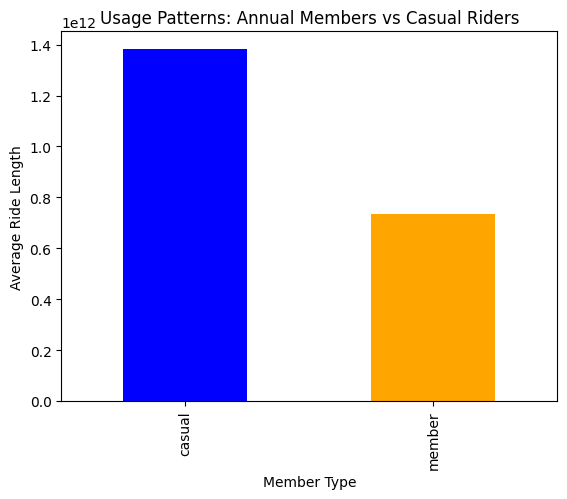

In [75]:
# Group by member_casual and calculate the mean ride_length for each group
usage_patterns = df_new.groupby('member_casual')['ride_length'].mean()
print(usage_patterns)

# Plot the results
usage_patterns.plot(kind='bar', color=['blue', 'orange'])
plt.title('Usage Patterns: Annual Members vs Casual Riders')
plt.xlabel('Member Type')
plt.ylabel('Average Ride Length')
plt.show()

**Key Observations:**

The chart illustrates that casual riders exhibit an average ride length of 00:23:02.342186842, while members showcase an average ride length of 00:12:16.469692517. This suggests that, on average, casual riders take longer rides compared to members.

The disparity in average ride length between casual riders and members is relatively modest. Various factors may contribute to this, including both types of riders utilizing the bike-sharing program for brief trips within the city.

It's crucial to emphasize that this chart exclusively represents the average ride length and doesn't delve into the total number of rides taken by each rider category. It is plausible that casual riders may take fewer rides overall, but their individual rides tend to be lengthier.

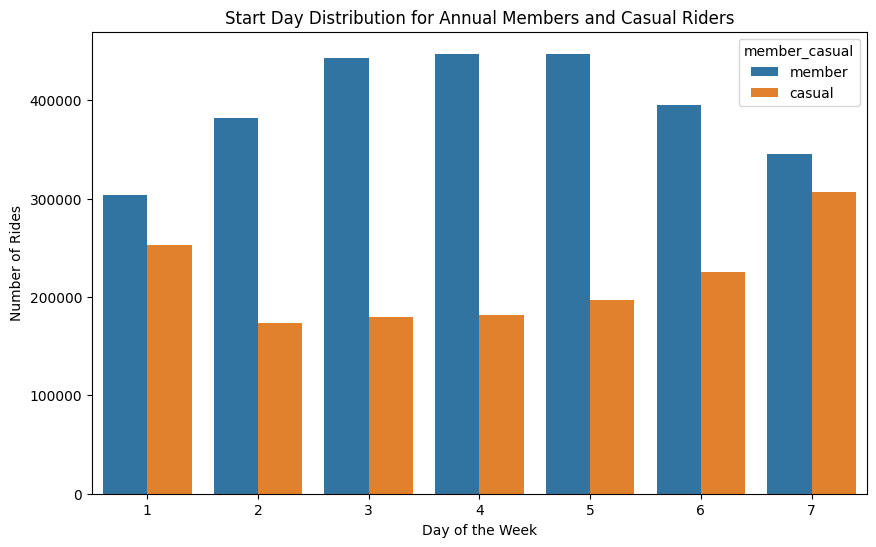

In [76]:
# Analyze start day of the week distribution for both member types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='day_of_week', hue='member_casual')
plt.title('Start Day Distribution for Annual Members and Casual Riders')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

**Key Findings:**

Overall Ride Distribution:
The data reveals a notable disparity in ride volume between weekdays and weekends. Annual members exhibit increased activity on weekdays, hinting at a preference for bike-sharing during regular workdays or commutes. Conversely, casual riders display a consistent ride volume throughout the week, pointing towards a potential inclination for leisure activities rather than structured commuting.

Member-Type Disparities:

Weekdays:
On weekdays, there is a discernible trend of higher ride counts among members compared to casual riders. This disparity suggests that annual members rely significantly on bike-sharing for their daily commutes or regular work-related activities.

Weekends:
During weekends, casual riders demonstrate a slightly elevated number of rides, implying a probable shift in usage towards recreational purposes. This observation aligns with the notion that casual riders may predominantly utilize the bikes for leisurely activities during their weekend downtime.


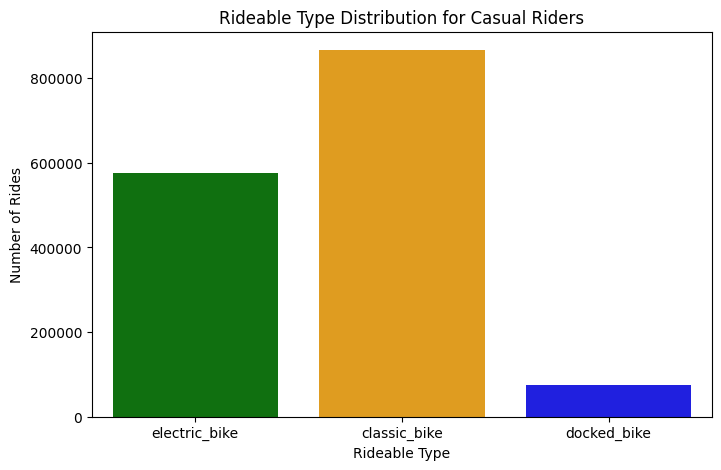

In [78]:
# Explore rideable_type distribution for casual riders
plt.figure(figsize=(8, 5))

# Define a custom color palette
custom_palette = {'docked_bike': 'blue', 'electric_bike': 'green', 'classic_bike': 'orange'}

# Use the custom palette in countplot and set hue to the column 'rideable_type'
sns.countplot(data=df_new[df_new['member_casual'] == 'casual'], x='rideable_type', hue='rideable_type', palette=custom_palette, legend=False)

plt.title('Rideable Type Distribution for Casual Riders')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

**Observations:**

Classic bikes are the most popular choice for casual riders, followed by Electric bikes and then docked bikes. 
This suggests a potential shift in user preferences or other factors influencing bike type choices.
Electric bikes, though not as popular as Classic bikes, seem to attract more casual riders than docked bikes. This could indicate a preference for specific features or functionalities offered by Classic bikes.

**Potential insights for Cyclist:**

Further investigate the reasons behind the unexpected popularity of Classic bikes among casual riders. Analyze factors like user demographics, ride purposes, or marketing efforts that might contribute to this trend.
Re-evaluate the appeal of docked bikes for casual riders. Consider their pricing, availability, and user experience compared to other options. Explore potential improvements or targeted marketing campaigns to increase their appeal.
Understand the niche appeal of electric bikes. Identify the specific user segments who prefer them and cater to their needs through targeted promotions or service enhancements.

rideable_type
classic_bike     1800184
electric_bike     963292
Name: count, dtype: int64


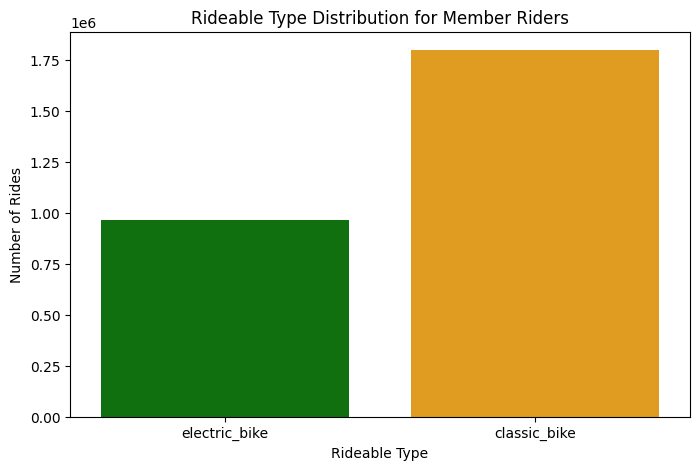

In [82]:
# Check the count of each rideable_type for member riders
member_riders_data = df_new[df_new['member_casual'] == 'member']

rideable_type_counts = member_riders_data['rideable_type'].value_counts()

print(rideable_type_counts)

# Explore rideable_type distribution for member riders
plt.figure(figsize=(8, 5))

# Define a custom color palette
custom_palette = {'docked_bike': 'blue', 'electric_bike': 'green', 'classic_bike': 'orange'}

# Use the custom palette in countplot and set hue to the column 'rideable_type'
sns.countplot(data=member_riders_data, x='rideable_type', hue='rideable_type', palette=custom_palette, legend=False)

plt.title('Rideable Type Distribution for Member Riders')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

Members, similar to casual riders, demonstrate a inclination towards the classic bikes, with a notable absence of usage for docked bikes among members.

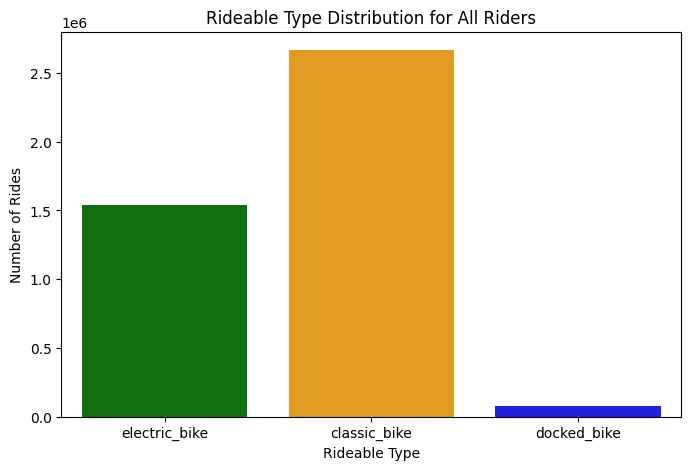

In [81]:
# Explore rideable_type distribution for all riders
plt.figure(figsize=(8, 5))

# Use the custom palette in countplot and set hue to the column 'rideable_type'
sns.countplot(data=df_new, x='rideable_type', hue='rideable_type', palette=custom_palette, legend=False)

plt.title('Rideable Type Distribution for All Riders')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

**Key observation:** Classic bikes and Electric bikes are popular among both casual and member riders,while docked bikes are less preferred.

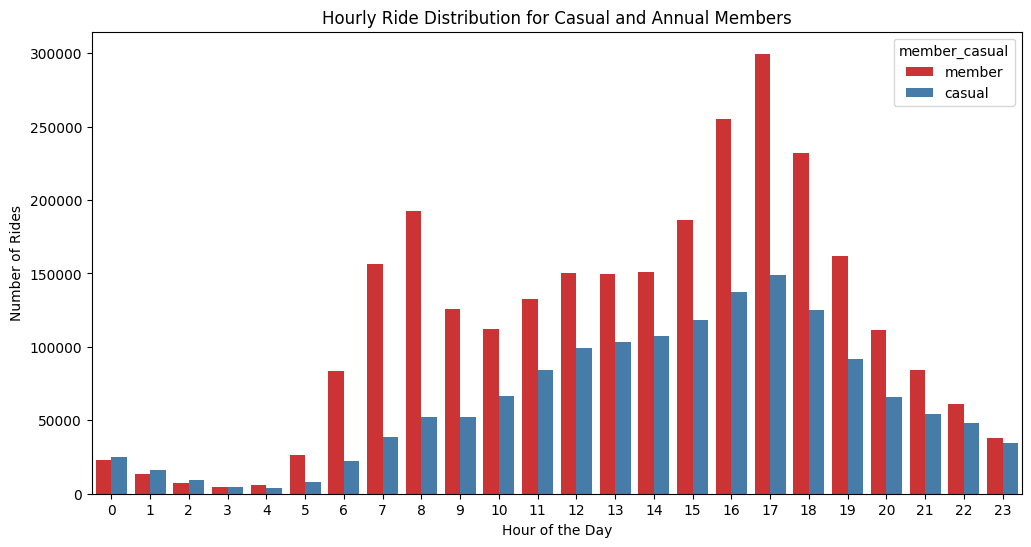

In [83]:
# Extract hour from 'started_at' timestamp
df_new['hour'] = df_new['started_at'].dt.hour

# Plot peak usage times
plt.figure(figsize=(12, 6))
sns.countplot(data=df_new, x='hour', hue='member_casual', palette='Set1')
plt.title('Hourly Ride Distribution for Casual and Annual Members')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

**Key Observation:**

The graphical representation illustrates distinct patterns in bike usage between casual riders and annual members throughout the day. Casual riders exhibit heightened bike utilization during midday hours, particularly between 12:00 PM and 7:00 PM. In contrast, annual members showcase an initial surge in bike usage starting at 6:00 AM, followed by a decline around 10:00 AM. Subsequently, their usage experiences incremental growth at 11:00 AM, reaching a sustained peak during the afternoon from 3:00 PM to 8:00 PM. Notably, annual members maintain consistent bike utilization during both morning and afternoon periods, gradually tapering off around 11:00 PM. Casual riders, on the other hand, commence their bike usage at 6:00 AM, steadily intensify their engagement, reaching its zenith at 3:00 PM, and gradually subside thereafter.

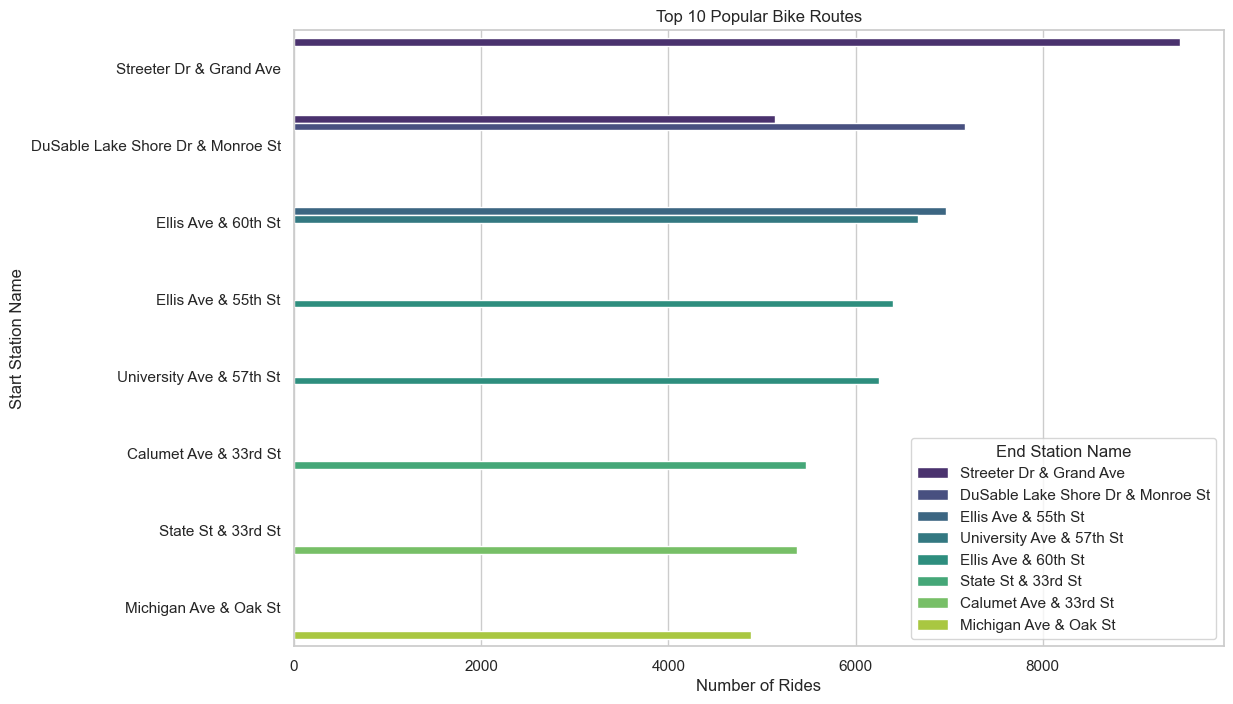

In [91]:
# Calculate the top 10 popular routes
top_10_routes = df_new.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='ride_count')
top_10_routes = top_10_routes.sort_values(by='ride_count', ascending=False).head(10)

sns.set(style="whitegrid")

# Plotting the top 10 popular routes
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='ride_count', y='start_station_name', hue='end_station_name', data=top_10_routes, palette='viridis')

# Adding labels and title
plt.title('Top 10 Popular Bike Routes')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station Name')
plt.legend(title='End Station Name', title_fontsize='12')

plt.show()

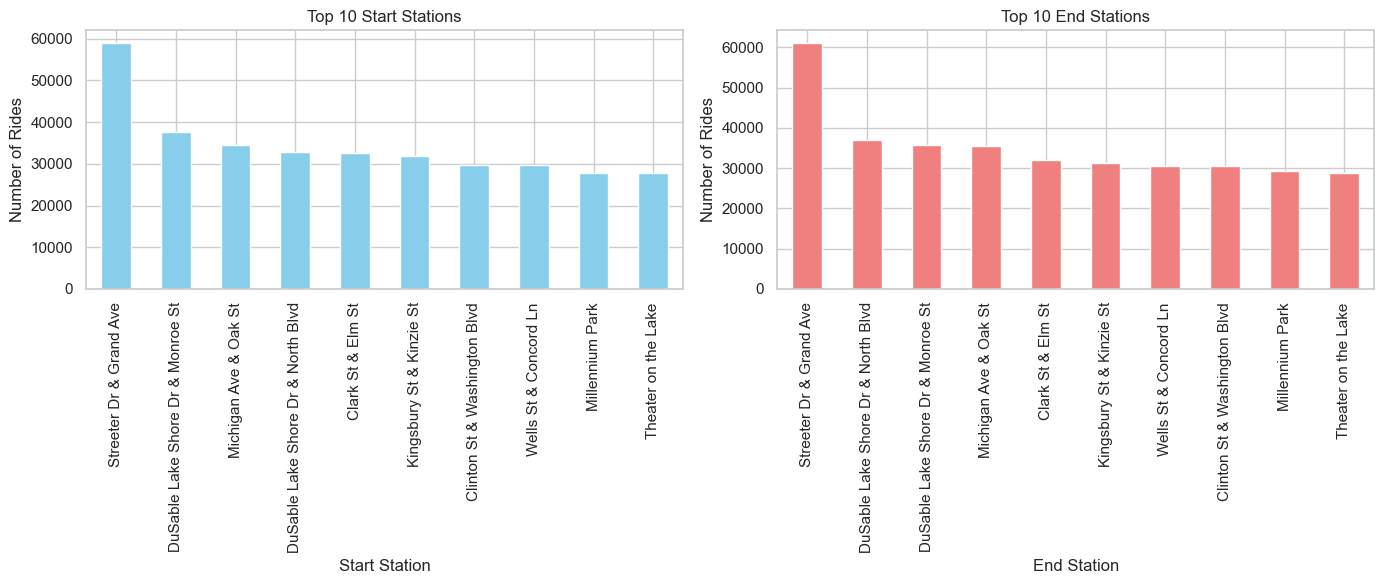

In [105]:
start_station_counts = df_new['start_station_name'].value_counts().nlargest(10)
end_station_counts = df_new['end_station_name'].value_counts().nlargest(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
start_station_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')

plt.subplot(1, 2, 2)
end_station_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Rides')

plt.tight_layout()
plt.show()

-Introduce special benefits for members on these popular routes, such as discounted rates, exclusive events, or loyalty rewards. Highlight the advantages of becoming a member.

-Use digital media and targeted advertising on social platforms to promote annual memberships specifically for these popular routes. Emphasize the convenience and cost-effectiveness of membership for frequent riders.

-Collect feedback from riders on these routes to understand their preferences and expectations. Use this information to enhance the member experience and address any concerns that may be deterring casual riders from becoming members.

-Explore partnerships with local businesses or events along these routes. Members could enjoy special discounts or perks, creating additional incentives for casual riders to convert.

-Run time-limited promotions or incentive programs for casual riders on these routes to encourage them to sign up for annual memberships. This could include discounted membership fees or bonus ride credits.

-Foster a sense of community among riders on these routes. Create social media groups or organize community events to encourage interaction and build a Cyclistic member community.

### **Note: I aimed to examine how a sample size mirrors the population size. Therefore, I extracted a sample dataset for a comparable analysis conducted on the entire population. It appears that the analysis effectively reflects the characteristics of the population.**

In [92]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Calculate population size from df_cleaned
population_size = df_new.shape[0]

# Given parameters
confidence_level = 0.98
margin_of_error = 0.05

# Calculate standard deviation assuming p=0.5 (maximum uncertainty)
std_dev = np.sqrt(0.25)

In [93]:
# Calculate z-score for the given confidence level
z_score = norm.ppf((1 + confidence_level) / 2)

In [94]:
# Calculate required sample size
required_sample_size = int(np.ceil((z_score**2 * (std_dev**2)) / (margin_of_error**2)))

In [95]:
# Draw a random sample from the population
random_seed = 42  # Set a seed for reproducibility
sample = df_new.sample(n=required_sample_size, random_state=random_seed)

In [96]:
# Save the sample to a different variable
df_sample = sample.copy()

In [97]:
# Draw a random sample from the population
random_seed = 42  # Set a seed for reproducibility
df_sample = df_new.sample(n=required_sample_size, random_state=random_seed)

# Obtain the complementary dataset (population - sample)
df_remaining = df_new.drop(df_sample.index)

# Ensure the sample size represents the entire population
assert len(df_remaining) + len(df_sample) == population_size

In [98]:
df_sample

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Start_day,Start_month,Start_year,hour
4624554,FACD57AE5808EDC9,electric_bike,2023-10-10 20:35:00,2023-10-10 20:44:00,0 days 00:09:00,3,Halsted St & Clybourn Ave,331,Wilton Ave & Diversey Pkwy,TA1306000014,41.909668,-87.648128,41.932418,-87.652705,member,10,10,2023,20
1754334,2204462C7D928E60,electric_bike,2023-06-19 13:14:00,2023-06-19 13:27:00,0 days 00:13:00,2,DuSable Lake Shore Dr & Monroe St,13300,Streeter Dr & Grand Ave,13022,41.880958,-87.616743,41.892278,-87.612043,casual,19,6,2023,13
2135347,BA148A3A669CE5E0,electric_bike,2023-06-26 17:45:00,2023-06-26 17:54:00,0 days 00:09:00,2,Clinton St & Madison St,TA1305000032,Ashland Ave & Division St,13061,41.882848,-87.641402,41.903450,-87.667747,casual,26,6,2023,17
1223277,BCCF4AB733BD58EF,electric_bike,2023-05-23 19:59:00,2023-05-23 20:27:00,0 days 00:28:00,3,Streeter Dr & Grand Ave,13022,Wells St & Hubbard St,TA1307000151,41.892256,-87.612246,41.889906,-87.634266,casual,23,5,2023,19
1391406,47986622291D36B3,classic_bike,2023-05-26 18:08:00,2023-05-26 18:23:00,0 days 00:15:00,6,Broadway & Sheridan Rd,13323,Lincoln Ave & Belle Plaine Ave,TA1309000026,41.952833,-87.649993,41.956004,-87.680161,member,26,5,2023,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019540,FD32A7A36635CEDA,classic_bike,2023-09-11 12:39:00,2023-09-11 12:43:00,0 days 00:04:00,2,Loomis St & Lexington St,13332,Morgan St & Polk St,TA1307000130,41.872210,-87.661447,41.871737,-87.651030,member,11,9,2023,12
608263,9476BE38265C8AE2,classic_bike,2023-03-20 18:21:00,2023-03-20 18:29:00,0 days 00:08:00,2,Dearborn St & Monroe St,TA1305000006,Federal St & Polk St,SL-008,41.881320,-87.629521,41.872078,-87.629544,member,20,3,2023,18
1052122,19782646DB0ED251,electric_bike,2023-04-10 14:39:00,2023-04-10 14:47:00,0 days 00:08:00,2,Western Ave & Lunt Ave,RP-005,Public Rack - Grand Ave & North Ave,867,42.008571,-87.690483,41.910000,-87.730000,casual,10,4,2023,14
4174868,A12D1580819FBA86,electric_bike,2023-09-07 07:56:00,2023-09-07 08:09:00,0 days 00:13:00,5,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,7,9,2023,7


In [99]:
# Task 1: Total number of rows
total_rows = len(df_sample)
print("Total number of rows:", total_rows)

Total number of rows: 542


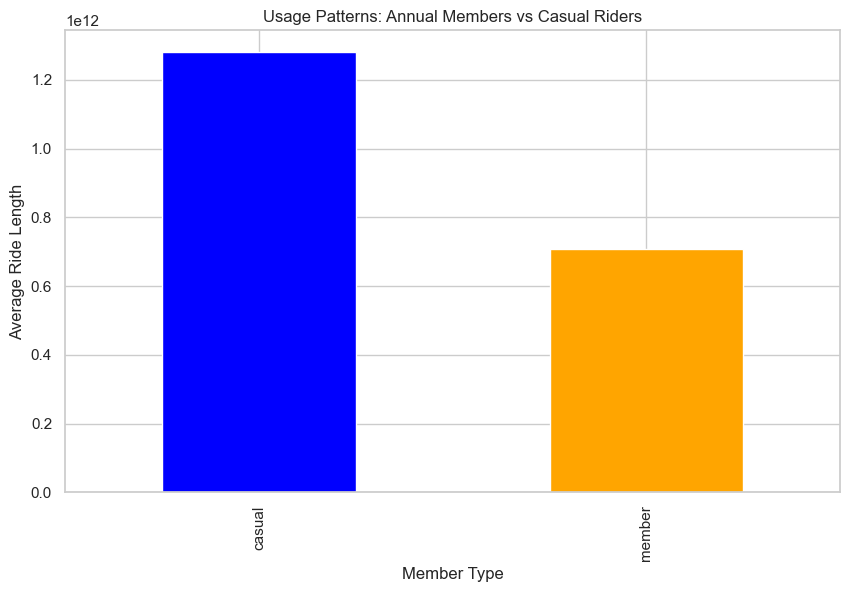

In [100]:
# Task 2: Identify key differences in usage patterns between annual members and casual riders.
usage_patterns = df_sample.groupby('member_casual')['ride_length'].mean()
# Plot the results
plt.figure(figsize=(10, 6))
usage_patterns.plot(kind='bar', color=['blue', 'orange'])
plt.title('Usage Patterns: Annual Members vs Casual Riders')
plt.xlabel('Member Type')
plt.ylabel('Average Ride Length')
plt.show()

### **Output of the sample size visuals are matching with the population size**

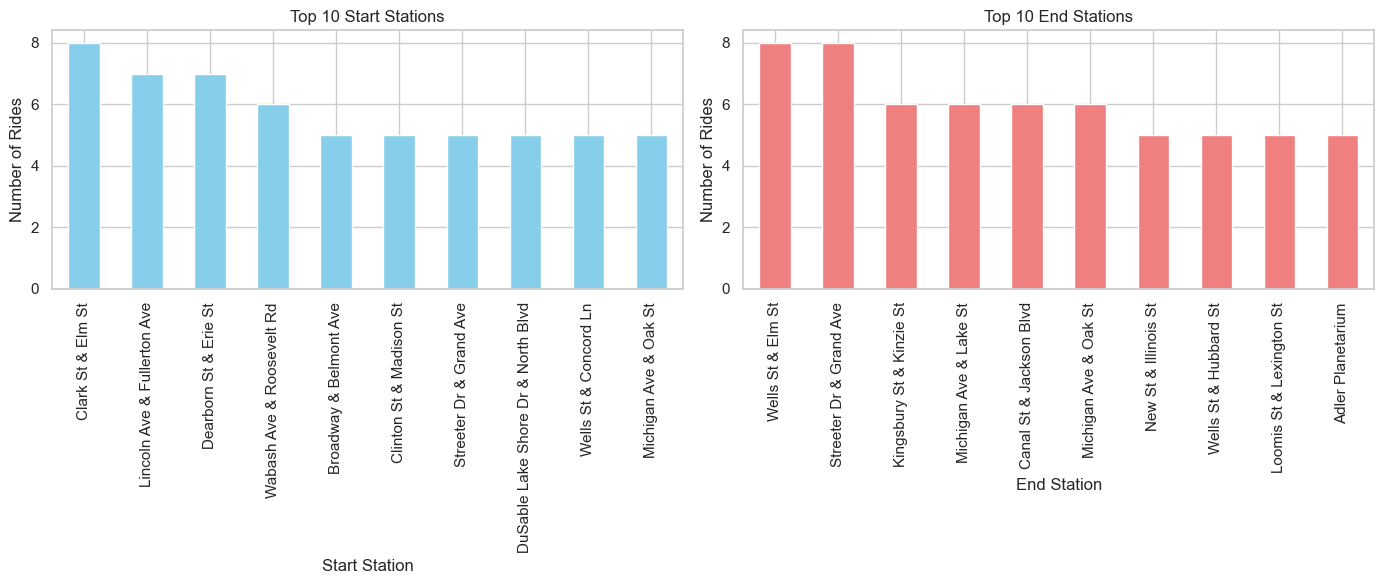

In [103]:
start_station_counts = df_sample['start_station_name'].value_counts().nlargest(10)
end_station_counts = df_sample['end_station_name'].value_counts().nlargest(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
start_station_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')

plt.subplot(1, 2, 2)
end_station_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Rides')

plt.tight_layout()
plt.show()


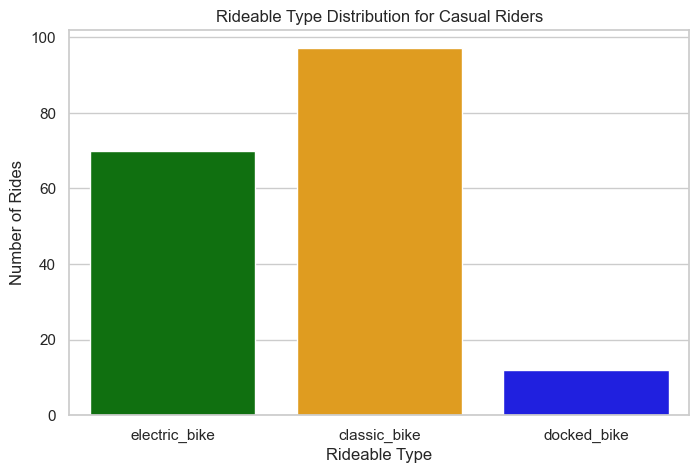

In [108]:
plt.figure(figsize=(8, 5))

# Define a custom color palette
custom_palette = {'docked_bike': 'blue', 'electric_bike': 'green', 'classic_bike': 'orange'}

# Use the custom palette in countplot and set hue to the column 'rideable_type'
sns.countplot(data=df_sample[df_sample['member_casual'] == 'casual'], x='rideable_type', hue='rideable_type', palette=custom_palette, legend=False)

plt.title('Rideable Type Distribution for Casual Riders')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

## Project Conclusion:

The primary goal was to convert casual riders into annual members, thereby increasing profitability. Through a systematic data analysis process, we gained valuable insights into user behavior, preferences, and potential conversion strategies.

**Key Findings:**

Rideable Type Preferences:
Casual riders predominantly favor classic bikes and electric bikes.
Annual members also show a preference for classic bikes.

Ride Length Analysis:
Casual riders tend to have shorter ride lengths, often opting for quick trips.
Annual members exhibit a more varied range of ride lengths, indicating a broader spectrum of usage scenarios.

Peak Usage Times:
Analyzing peak usage times can help in designing targeted marketing strategies.
Casual riders may show peaks during specific hours or days, offering an opportunity for promotional campaigns.

**Summary:**

The analysis provided a comprehensive understanding of how annual members and casual riders differ in their bike usage. Classic bikes emerged as popular among both rider categories. Ride length patterns and peak usage times offer actionable insights for tailoring marketing efforts.

**To address the business problem of converting casual riders to annual members, Cyclistic can consider the following recommendations:**

Targeted Promotions: Design targeted promotions during peak hours/days and align them with special events.
Membership Benefits: Highlight the benefits of annual membership, such as flexibility in ride lengths and preferred bike choices.
User Engagement: Encourage user engagement through personalized offers, loyalty programs, and community-building initiatives.

In conclusion, leveraging data insights provides Cyclistic with a strategic advantage in crafting effective marketing campaigns, enhancing user experiences, and driving the desired shift from casual ridership to annual memberships. The findings pave the way for a customer-centric approach and data-informed decision-making in the pursuit of increased profitability and market share.